## Generating Images via Color Augmentation & Random Cropping
In order for this step to work, ensure the os.cwd() is in hte proper folder where your four different classes are.

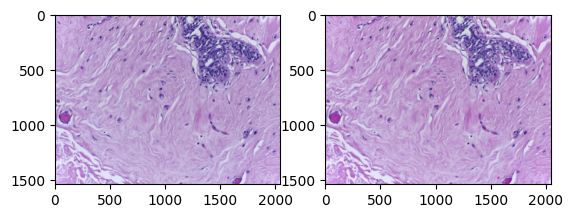

In [34]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
def hematoxylin_eosin_aug(img, low=0.6, high=1.9, seed=None):
    """
    "Quantification of histochemical staining by color deconvolution"
    Arnout C. Ruifrok, Ph.D. and Dennis A. Johnston, Ph.D.
    http://www.math-info.univ-paris5.fr/~lomn/Data/2017/Color/Quantification_of_histochemical_staining.pdf
    Performs random hematoxylin-eosin augmentation
    # Arguments
        img: Numpy image array.
        low: Low boundary for augmentation multiplier
        high: High boundary for augmentation multiplier
    # Returns
        Augmented Numpy image array.
    """
    D = np.array([[1.88, -0.07, -0.60],
                  [-1.02, 1.13, -0.48],
                  [-0.55, -0.13, 1.57]])
    M = np.array([[0.65, 0.70, 0.29],
                  [0.07, 0.99, 0.11],
                  [0.27, 0.57, 0.78]])
    Io = 240

    h, w, c = img.shape
    OD = -np.log10((img.astype("uint16") + 1) / Io)
    C = np.dot(D, OD.reshape(h * w, c).T).T
    r = np.ones(3)
    r[:2] = np.random.RandomState(seed).uniform(low=low, high=high, size=2)
    img_aug = np.dot(C * r, M)

    img_aug = Io * np.exp(-img_aug * np.log(10)) - 1
    img_aug = img_aug.reshape(h, w, c).clip(0, 255).astype("uint8")
    return img_aug

img = cv2.imread('./Benign/BACH_Challenge_B_001.png')
img2 = hematoxylin_eosin_aug(img)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()

(1536, 2048, 3)
(1500, 1500, 3)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_15484\3404756110.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<AxesSubplot: >

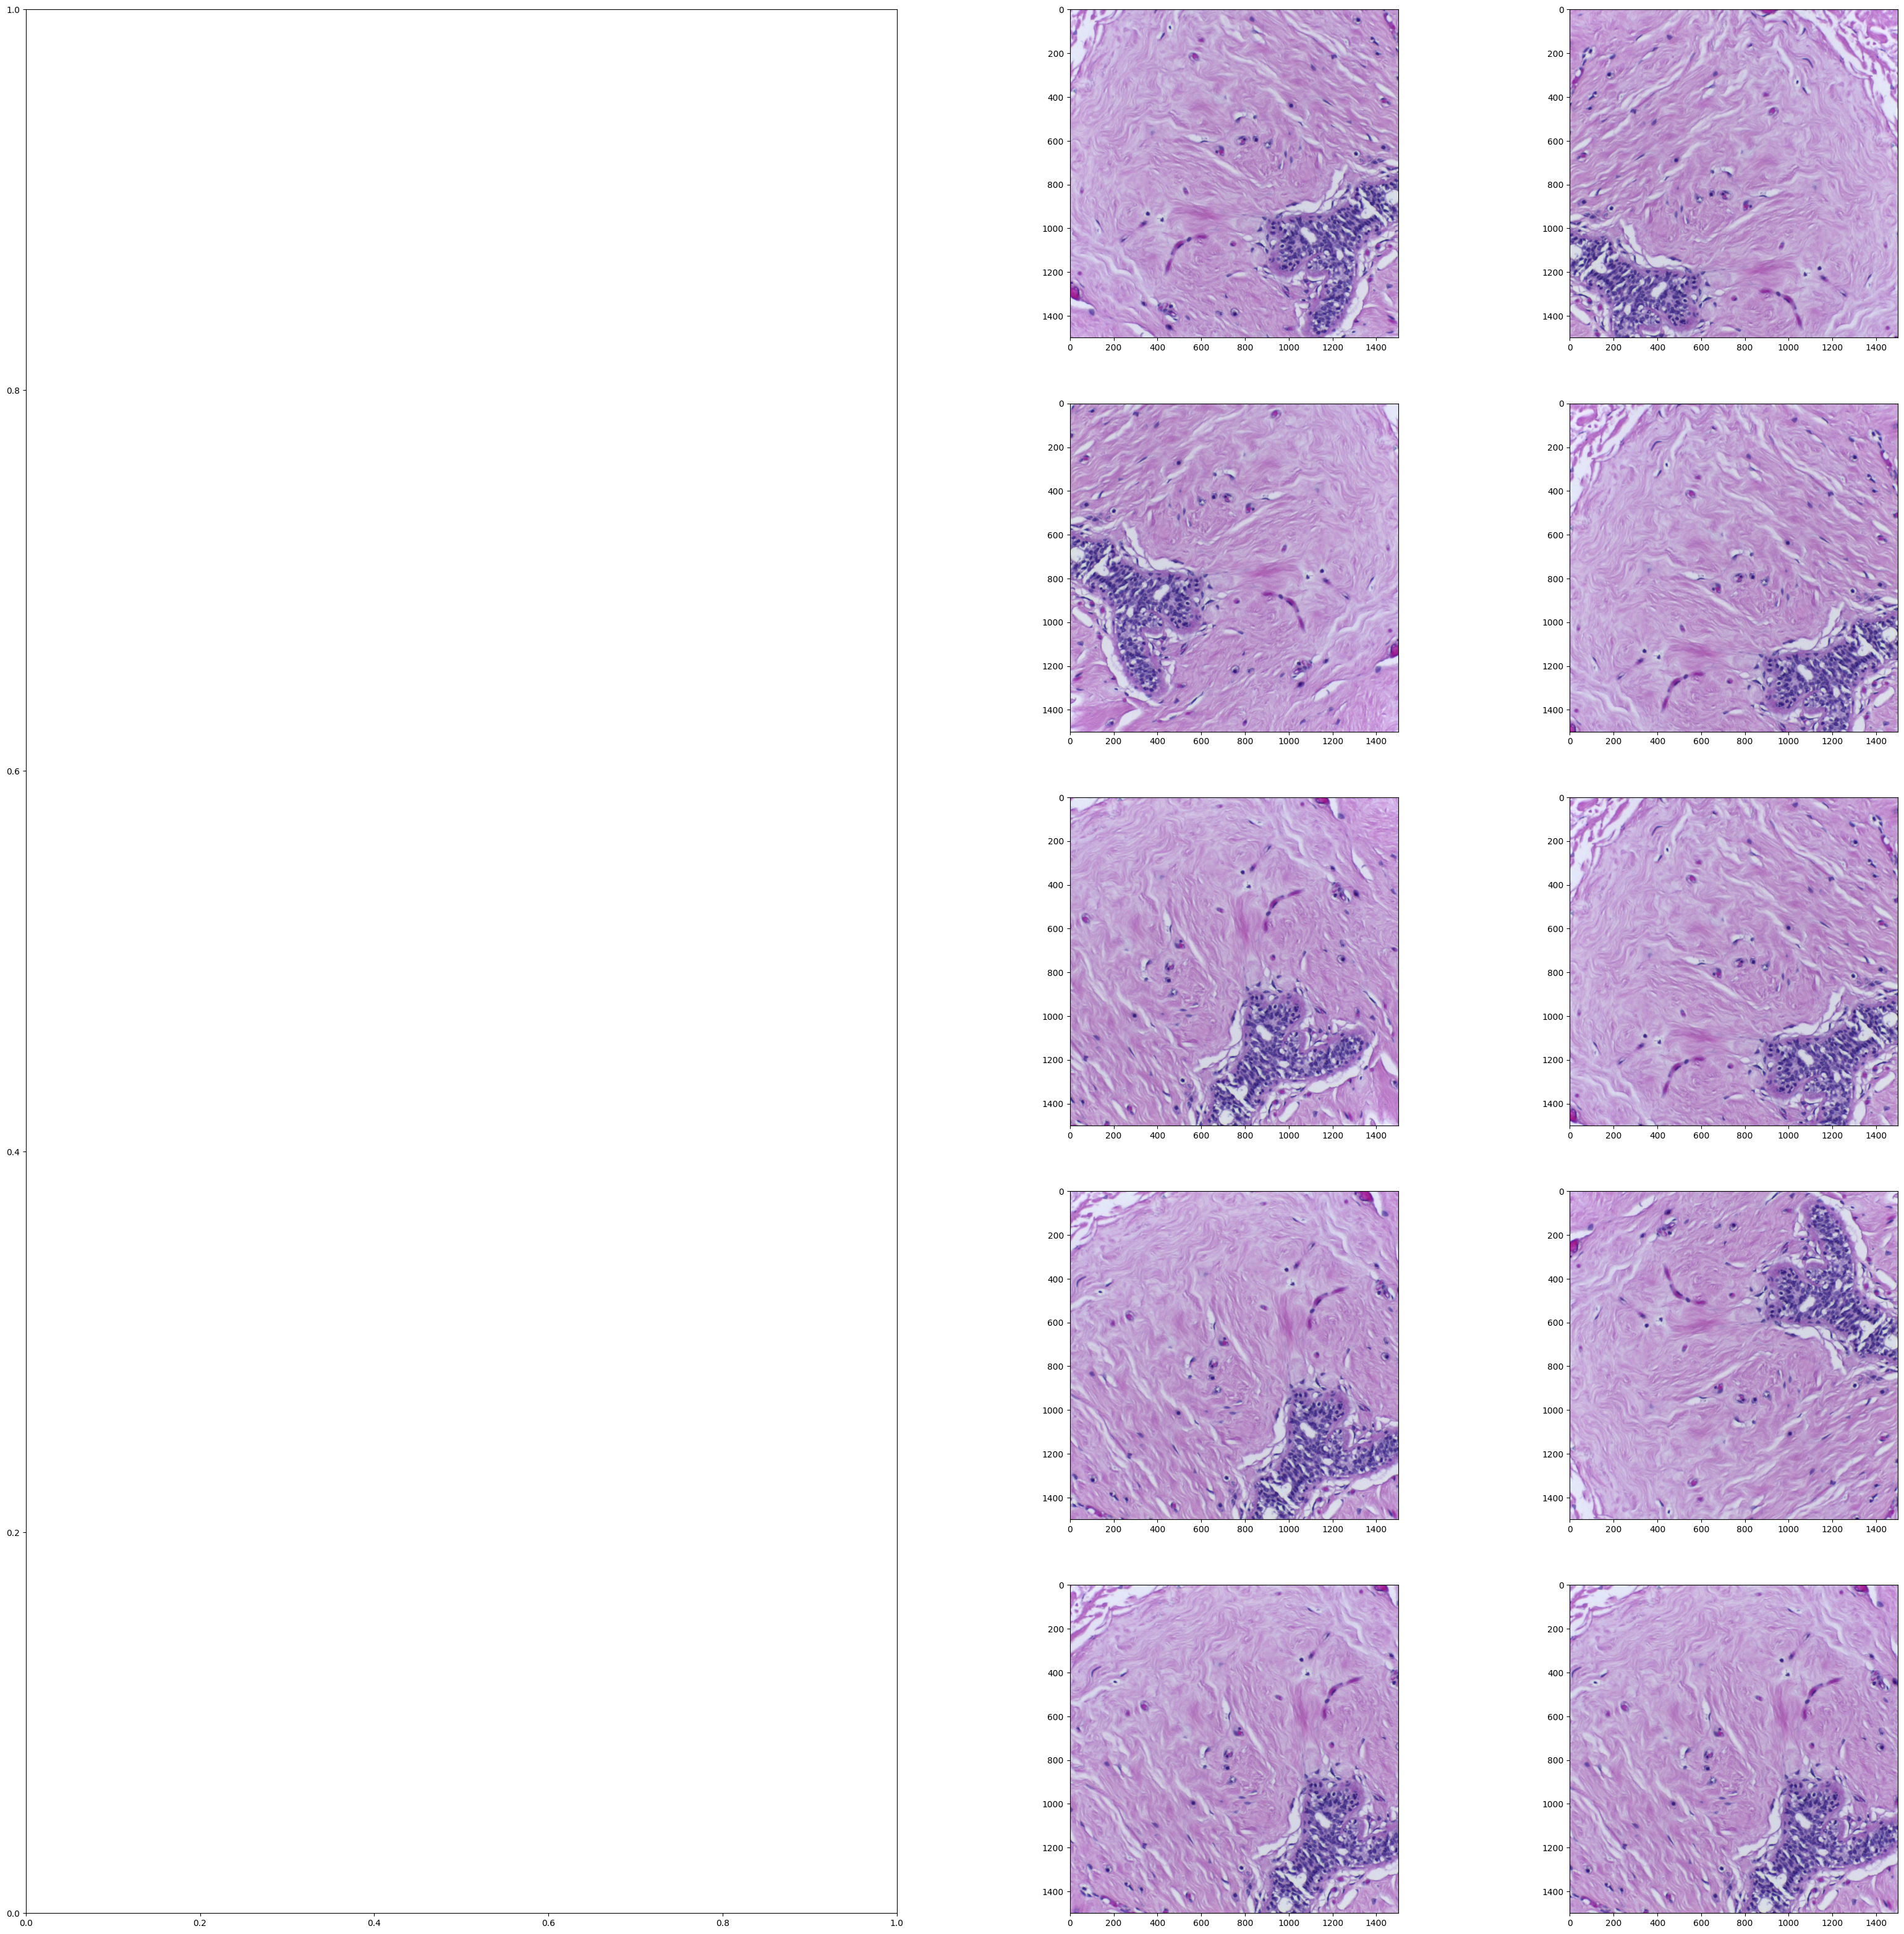

In [35]:
def get_crops(img, size = 400, n = 20, seed=None):
    """Creates random square crops of given size from a Numpy image array. No rotation added
    # Arguments
        img: Numpy image array.
        size: size of crops.
        n: number of crops
        seed: Random seed.
    # Returns
        Numpy array of crops, shape (n, size, size, c).
    """
    h, w, c = img.shape
    assert all([size < h, size < w])
    crops = []
    for _ in range(n):
        top = np.random.randint(low=0, high=h - size + 1)
        left = np.random.randint(low=0, high=w - size + 1)
        crop = img[top: top + size, left: left + size].copy()
        crop = np.rot90(crop, np.random.randint(low=0, high=4))
        if np.random.random() > 0.5:
            crop = np.flipud(crop)
        if np.random.random() > 0.5:
            crop = np.fliplr(crop)
        crops.append(crop)

    crops = np.stack(crops)
    assert crops.shape == (n, size, size, c)
    return crops
single_image_crops = get_crops(img2, 1500, 20)
print(img2.shape)
print(single_image_crops[3].shape)
figs, axs = plt.subplots(nrows = 5, ncols = 4, figsize = (40,40))
axs  = axs.ravel()
for i in range(len(single_image_crops)):
    axs[i].imshow(single_image_crops[i])
plt.subplot(121)

In [31]:
l = os.listdir()

In [42]:
AUGMENTATIONS_PER_IMAGE = 5
# for _ in range(AUGMENTATIONS_PER_IMAGE):

for folders in l:
    folder = os.listdir('./{}'.format(folders))
    try:
        os.mkdir('./lite-dataset/{}-aug'.format(folders))
    except:
        print('directory exists')
    try:
        folder.remove('.DS_Store')
    
    except:
        print('file not found')
    for imgs in folder:
        for patch_sizes in [400,650]:
            for j in range(AUGMENTATIONS_PER_IMAGE):
                img = cv2.imread('./{}/{}'.format(folders,imgs))
                color_shift = hematoxylin_eosin_aug(img)
                single_image_crops = get_crops(color_shift,patch_sizes,20)
                for i in range(len(single_image_crops)):
                    try:
                        cv2.imwrite('./lite-dataset/{}-aug/{}{}{}{}--3.png'.format(folders,imgs.replace('.png',''),i,j,patch_sizes),single_image_crops[i])
                    except:
                        print('img exists!')



directory exists
file not found
